In [1]:
import autograd.numpy as ag_np
import matplotlib.pyplot as plt
from AbstractBaseCollabFilterSGD import AbstractBaseCollabFilterSGD
from train_valid_test_loader import load_train_valid_test_datasets

from CollabFilterOneVectorPerItem import CollabFilterOneVectorPerItem

import scipy.stats as scp

In [2]:
# Load the dataset
train_tuple, valid_tuple, test_tuple, n_users, n_items = \
    load_train_valid_test_datasets()

In [3]:
y = scp.randint.rvs(400, 500, size=20, random_state=13)
z = scp.randint.rvs(100, 200, size=20, random_state=13)
x = scp.uniform.rvs(4, 0.8, size=20, random_state=13)
print(y)
print(z)

[482 448 474 416 498 425 458 499 426 466 446 454 477 474 473 475 452 402
 432 419]
[182 148 174 116 198 125 158 199 126 166 146 154 177 174 173 175 152 102
 132 119]


In [4]:
n_trials = 15

In [5]:
n_ep = scp.randint.rvs(250, 251, size=n_trials, random_state=13)
btch_sz = scp.randint.rvs(200, 800, size=n_trials, random_state=19)
stp_sz = scp.uniform.rvs(0.8, 0.2, size=n_trials, random_state=15)
a = scp.beta.rvs(1.2, 5, size=n_trials, random_state=16)
n_fct = scp.randint.rvs(50, 200, size=n_trials, random_state=18)

In [6]:
model_list=list()
for i in range(n_trials):
    model_list.append(CollabFilterOneVectorPerItem(
        n_epochs=n_ep[i], batch_size=btch_sz[i], step_size=stp_sz[i],
        alpha=a[i], n_factors=n_fct[i]))
    print("Model ", i+1, ":",
          "\n\tn_epochs:   ", n_ep[i],
          "\n\tbatch_size: ", btch_sz[i],
          "\n\tstep_size:  ", stp_sz[i],
          "\n\talpha:      ", a[i],
          "\n\tn_factors:  ", n_fct[i])

Model  1 : 
	n_epochs:    250 
	batch_size:  554 
	step_size:   0.9697635394537159 
	alpha:       0.32252450551352896 
	n_factors:   92
Model  2 : 
	n_epochs:    250 
	batch_size:  219 
	step_size:   0.8357791849841998 
	alpha:       0.04175071509094907 
	n_factors:   69
Model  3 : 
	n_epochs:    250 
	batch_size:  508 
	step_size:   0.8108726428612864 
	alpha:       0.061177501974355154 
	n_factors:   170
Model  4 : 
	n_epochs:    250 
	batch_size:  530 
	step_size:   0.8723076892176447 
	alpha:       0.09578746850825888 
	n_factors:   119
Model  5 : 
	n_epochs:    250 
	batch_size:  640 
	step_size:   0.8550801857212824 
	alpha:       0.2263873613628099 
	n_factors:   116
Model  6 : 
	n_epochs:    250 
	batch_size:  734 
	step_size:   0.9060000449790852 
	alpha:       0.015505394339425868 
	n_factors:   58
Model  7 : 
	n_epochs:    250 
	batch_size:  362 
	step_size:   0.8611837831471832 
	alpha:       0.11234729110797521 
	n_factors:   195
Model  8 : 
	n_epochs:    250 
	batch_size:

In [7]:
for i, model in enumerate(model_list):
    model.init_parameter_dict(n_users, n_items, train_tuple)
    model.fit(train_tuple, valid_tuple)
    print("Model ", i+1, " of ", n_trials, " trained.")

Model  1  of  15  trained.
Model  2  of  15  trained.
Model  3  of  15  trained.
Model  4  of  15  trained.
Model  5  of  15  trained.
Model  6  of  15  trained.
Model  7  of  15  trained.
Model  8  of  15  trained.
Model  9  of  15  trained.
Model  10  of  15  trained.
Model  11  of  15  trained.
Model  12  of  15  trained.
Model  13  of  15  trained.
Model  14  of  15  trained.
Model  15  of  15  trained.


<ipython-input-24-f981208644a1>:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(n_rows,n_cols,i+1)


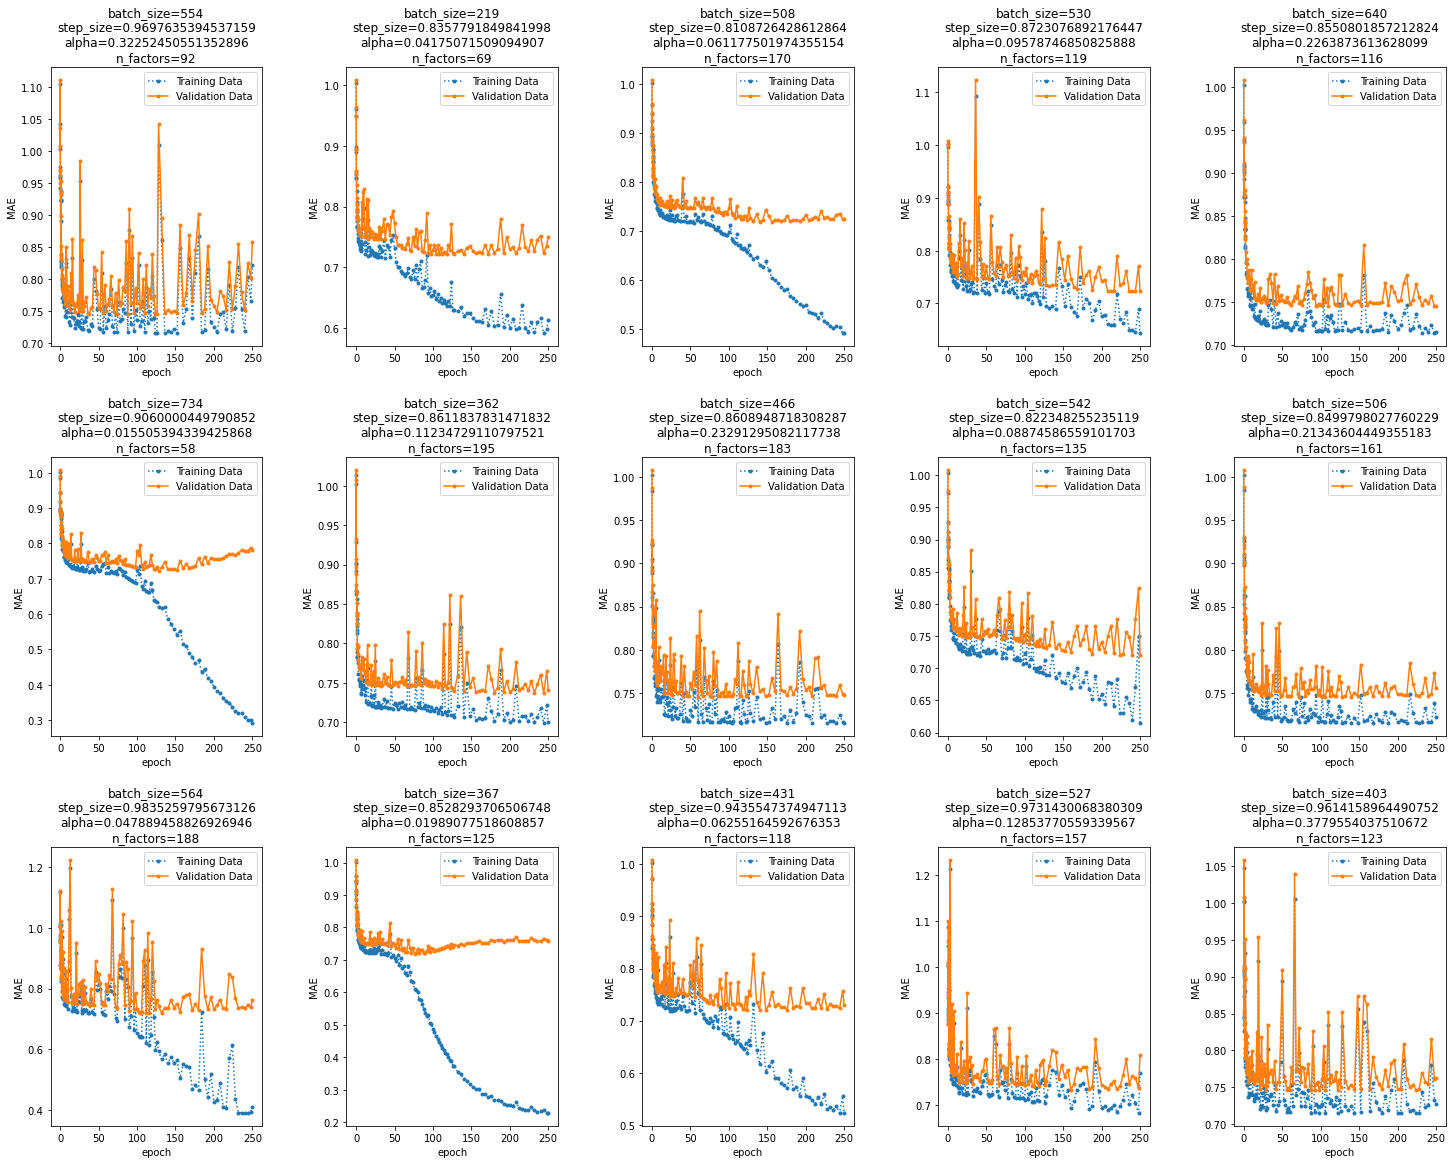

In [24]:
n_rows = ag_np.ceil(n_trials/5)
n_cols = min(n_trials,5)
f, axs = plt.subplots(1,n_trials,figsize=(5*n_cols,5*n_rows))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.4, wspace=0.4)

for i in range(n_trials):
    plt.subplot(n_rows,n_cols,i+1)
    plt.plot(model_list[i].trace_epoch, model_list[i].trace_mae_train, '.:')
    plt.plot(model_list[i].trace_epoch, model_list[i].trace_mae_valid, '.-')
    plt.xlabel("epoch")
    plt.ylabel("MAE")
    plt.legend(["Training Data", "Validation Data"])
    plt.title("batch_size=" + str(btch_sz[i]) + "\nstep_size=" + str(stp_sz[i]) + "\nalpha=" + str(a[i]) + "\nn_factors=" + str(n_fct[i]))

In [25]:
min_maes = ag_np.ones(n_trials)
min_epoch = ag_np.ones(n_trials)
for i in range(n_trials):
    min_maes[i] = ag_np.min(model_list[i].trace_mae_valid)
    min_epoch[i] = model_list[i].trace_epoch[ag_np.argmin(model_list[i].trace_mae_valid)]
print(min_maes)
print(min_epoch)
print(ag_np.min(model_list[2].trace_mae_train))

[0.74602445 0.72156081 0.71834705 0.72282863 0.74514799 0.72119471
 0.73660543 0.74579654 0.72048457 0.74579968 0.71843574 0.71987349
 0.7200691  0.73323329 0.74595392]
[ 74. 112. 156. 236. 248. 128. 244.  78. 224. 140. 112.  76. 148. 160.
  98.]
0.49129258803588227


In [ ]:
MAE = 0.71839775
batch_size=508
step_size=0.8108726428612864
alpha=0.061177501974355154
n_factors=122
n_epochs=168

MAE:         0.71834705
batch_size:  508 
step_size:   0.8108726428612864 
alpha:       0.061177501974355154 
n_factors:   170
n_epochs:    156

In [27]:
btch = [50, 100, 500, 1000, 5000]
model_list=list()
for btch_val in btch:
    model_list.append(CollabFilterOneVectorPerItem(
        n_epochs=20, batch_size=btch_val, step_size=0.9,
        alpha=0.2, n_factors=50))

Model  1  of  5  trained.
Model  2  of  5  trained.
Model  3  of  5  trained.
Model  4  of  5  trained.
Model  5  of  5  trained.


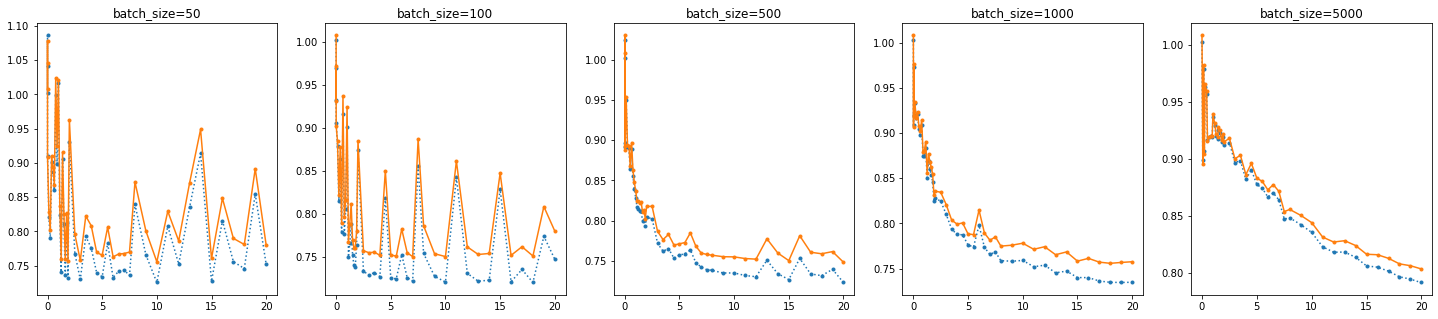

In [29]:
M = len(model_list)
f, axs = plt.subplots(1,M,figsize=(5*M,5))

for i, model in enumerate(model_list):
    model.init_parameter_dict(n_users, n_items, train_tuple)
    model.fit(train_tuple, valid_tuple)
    print("Model ", i+1, " of ", M, " trained.")
    
    plt.subplot(1,M,i+1)
    plt.plot(model_list[i].trace_epoch, model_list[i].trace_mae_train, '.:')
    plt.plot(model_list[i].trace_epoch, model_list[i].trace_mae_valid, '.-')
    plt.title("batch_size=" + str(btch[i]))

In [ ]:
min_maes = ag_np.ones(5)
min_epoch = ag_np.ones(5)
for i in range(M):
    min_maes[i] = ag_np.min(model_list[i].trace_mae_valid)
    min_epoch[i] = model_list[i].trace_epoch[ag_np.argmin(model_list[i].trace_mae_valid)]
print(min_maes)
print(min_epoch)

In [ ]:
M = len(model_list)
f, axs = plt.subplots(1,M,figsize=(5*M,5))

for i in range(M):
    plt.subplot(1,M,i+1)
    plt.plot(model_list[i].trace_epoch, model_list[i].trace_mae_train, '.:')
    plt.plot(model_list[i].trace_epoch, model_list[i].trace_mae_valid, '.-')
    plt.title("alpha=" + str(a[i]))